In [36]:
import numpy as np
import pandas as pd

In [37]:
df = pd.read_csv("housing_price_dataset.csv")
df


,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [38]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [39]:
df.columns = df.columns.str.lower()
df.columns

Index(['squarefeet', 'bedrooms', 'bathrooms', 'neighborhood', 'yearbuilt',
       'price'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   squarefeet    50000 non-null  int64  
 1   bedrooms      50000 non-null  int64  
 2   bathrooms     50000 non-null  int64  
 3   neighborhood  50000 non-null  object 
 4   yearbuilt     50000 non-null  int64  
 5   price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


Now let's change how we measure the years in the company by changing the joining year by the years in the company.

In [40]:
df["house_age"] = 2024 - df["yearbuilt"]
df["house_age"] 

0        55
1        44
2        54
3        28
4        23
         ..
49995    49
49996    36
49997    62
49998    40
49999    13
Name: house_age, Length: 50000, dtype: int64

In [41]:
del df["yearbuilt"]

In [42]:
df.columns

Index(['squarefeet', 'bedrooms', 'bathrooms', 'neighborhood', 'price',
       'house_age'],
      dtype='object')

The Bedrooms ans bathrooms are categorical and non contineuous values

In [47]:
df["bathrooms"].astype(object)
df["bedrooms"].astype(object)
df

,squarefeet,bedrooms,bathrooms,neighborhood,price,house_age
0,2126,4,1,Rural,215355.283618,55
1,2459,3,2,Rural,195014.221626,44
2,1860,2,1,Suburb,306891.012076,54
3,2294,2,1,Urban,206786.787153,28
4,2130,5,2,Suburb,272436.239065,23
...,...,...,...,...,...,...
49995,1282,5,3,Rural,100080.865895,49
49996,2854,2,2,Suburb,374507.656727,36
49997,2979,5,3,Suburb,384110.555590,62
49998,2596,5,2,Rural,380512.685957,40


In [48]:
df.head()

,squarefeet,bedrooms,bathrooms,neighborhood,price,house_age
0,2126,4,1,Rural,215355.283618,55
1,2459,3,2,Rural,195014.221626,44
2,1860,2,1,Suburb,306891.012076,54
3,2294,2,1,Urban,206786.787153,28
4,2130,5,2,Suburb,272436.239065,23


In [49]:
df.neighborhood.value_counts()

neighborhood
Suburb    16721
Rural     16676
Urban     16603
Name: count, dtype: int64

In [50]:
df.dtypes

squarefeet        int64
bedrooms          int64
bathrooms         int64
neighborhood     object
price           float64
house_age         int64
dtype: object

In [51]:
categorical_columns = df.dtypes[df.dtypes==object].index
for column in categorical_columns:
    df[column] = df[column].str.lower().str.replace(" ","_")

df    

,squarefeet,bedrooms,bathrooms,neighborhood,price,house_age
0,2126,4,1,rural,215355.283618,55
1,2459,3,2,rural,195014.221626,44
2,1860,2,1,suburb,306891.012076,54
3,2294,2,1,urban,206786.787153,28
4,2130,5,2,suburb,272436.239065,23
...,...,...,...,...,...,...
49995,1282,5,3,rural,100080.865895,49
49996,2854,2,2,suburb,374507.656727,36
49997,2979,5,3,suburb,384110.555590,62
49998,2596,5,2,rural,380512.685957,40


#### Data Preprocessing

In this step, we'll handle any missing values and convert categorical variables into a numerical format. We'll use DictVectorizer to create one-hot encoding for the 'Neighborhood' variable.

In [52]:
df.isnull().sum()

squarefeet      0
bedrooms        0
bathrooms       0
neighborhood    0
price           0
house_age       0
dtype: int64

In [53]:
df = pd.get_dummies(df, columns=['neighborhood'], drop_first=False).astype(int)
df = pd.get_dummies(df, columns=['bathrooms'], drop_first=False).astype(int)
df = pd.get_dummies(df, columns=['bedrooms'], drop_first=False).astype(int)
df.head()


,squarefeet,price,house_age,neighborhood_rural,neighborhood_suburb,neighborhood_urban,bathrooms_1,bathrooms_2,bathrooms_3,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5
0,2126,215355,55,1,0,0,1,0,0,0,0,1,0
1,2459,195014,44,1,0,0,0,1,0,0,1,0,0
2,1860,306891,54,0,1,0,1,0,0,1,0,0,0
3,2294,206786,28,0,0,1,1,0,0,1,0,0,0
4,2130,272436,23,0,1,0,0,1,0,0,0,0,1


In [54]:
df.columns

Index(['squarefeet', 'price', 'house_age', 'neighborhood_rural',
       'neighborhood_suburb', 'neighborhood_urban', 'bathrooms_1',
       'bathrooms_2', 'bathrooms_3', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4',
       'bedrooms_5'],
      dtype='object')

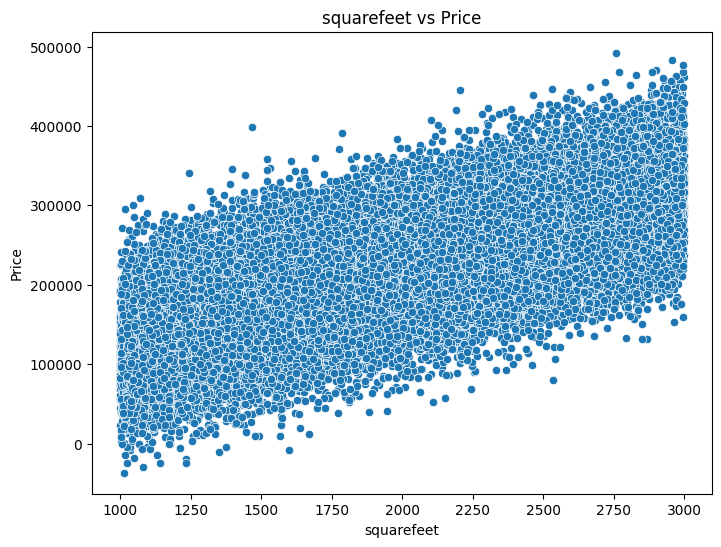

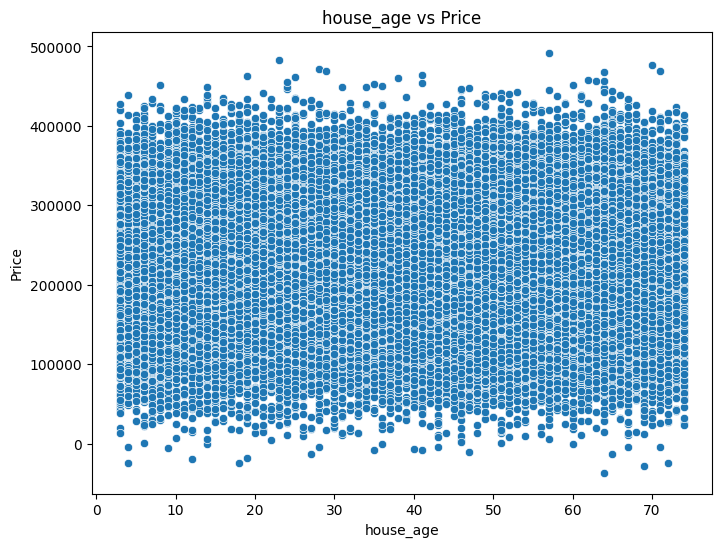

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_features = ['squarefeet', 'house_age']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='price', data=df)
    plt.title(f'{feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

In [56]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df,test_size=0.2,random_state=1)
df_train, df_val = train_test_split(df_full_train,test_size=0.25,random_state=1)
print(len(df_train),len(df_test),len(df_val))

30000 10000 10000


### Splitting into Training, Validation and Testing Sets

Now, we'll split the data into training, validation and testing sets to train our models on one subset and evaluate them on another.

In [57]:
df_full_train =df_full_train.reset_index(drop=True)
df_train =df_train.reset_index(drop=True)
df_val =df_val.reset_index(drop=True)
df_test =df_test.reset_index(drop=True)

In [64]:
df_train

,squarefeet,house_age,neighborhood_rural,neighborhood_suburb,neighborhood_urban,bathrooms_1,bathrooms_2,bathrooms_3,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5
0,2104,4,0,1,0,0,1,0,0,0,1,0
1,2219,24,0,0,1,1,0,0,0,1,0,0
2,2403,17,0,0,1,0,0,1,1,0,0,0
3,1691,19,1,0,0,0,0,1,0,0,0,1
4,1975,72,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1653,47,0,1,0,0,0,1,0,1,0,0
29996,1107,30,0,0,1,1,0,0,0,0,1,0
29997,1293,4,0,1,0,0,0,1,0,0,1,0
29998,1114,45,0,1,0,0,1,0,0,0,1,0


###  Splitting the Data

Now, we'll split the data into features (X) and the target variable (y). The target variable is 'Price', and the rest of the columns are considered features


In [58]:
y_train = df_train["price"]
y_val = df_val["price"]
y_test = df_test["price"]
y_full_train = df_full_train["price"]

del df_train["price"]
del df_val["price"]
del df_test["price"]
del df_full_train["price"]

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()

linear_model.fit(df_train, y_train)

# Predictions on the training set
training_predictions = linear_model.predict(df_train)

# Evaluate the model on the training set
print("Training set performance:")
print("Mean Squared Error:", mean_squared_error(y_train, training_predictions))
print("R-squared Score:", r2_score(y_train, training_predictions))

# Predictions on the validation set
validation_predictions = linear_model.predict(df_val)

# Evaluate the model on the validation set
print("Validation set performance:")
print("Mean Squared Error:", mean_squared_error(y_val, validation_predictions))
print("R-squared Score:", r2_score(y_val, validation_predictions))

Training set performance:
Mean Squared Error: 2471766006.91643
R-squared Score: 0.5731241126557205
Validation set performance:
Mean Squared Error: 2554952371.7146654
R-squared Score: 0.5646354323782148


### Feature Scaling

We'll use standardization to scale the numerical features. This involves transforming the data such that it has a mean of 0 and a standard deviation of 1.

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(df_train)
X_val_scaled = scaler.transform(df_val)


In [66]:
# Now, let's retrain the Linear Regression model on the scaled data
linear_model_scaled = LinearRegression()
linear_model_scaled.fit(X_train_scaled, y_train)

# Predictions on the training set
train_predictions_scaled = linear_model_scaled.predict(X_train_scaled)

# Predictions on the testing set
val_predictions_scaled = linear_model_scaled.predict(X_val_scaled)

# Evaluate the model on both sets
print("Scaled Training set performance:")
print("Mean Squared Error:", mean_squared_error(y_train, train_predictions_scaled))
print("R-squared Score:", r2_score(y_train, train_predictions_scaled))

print("\nScaled Validation set performance:")
print("Mean Squared Error:", mean_squared_error(y_val, val_predictions_scaled))
print("R-squared Score:", r2_score(y_val, val_predictions_scaled))

Scaled Training set performance:
Mean Squared Error: 2472177471.933496
R-squared Score: 0.5730530523313291

Scaled Validation set performance:
Mean Squared Error: 2555112621.7633886
R-squared Score: 0.5646081257270434


It seems that feature scaling did not significantly improve the model's performance. The results are similar to the unscaled model.

Next, we can explore feature engineering to see if creating new features or transforming existing ones can enhance the model's predictive power. We'll start by adding polynomial features.

In [67]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly_features.fit_transform(df_train)

X_validation_poly = poly_features.transform(df_val)

# Retrain the Linear Regression model on the polynomial features
linear_model_poly = LinearRegression()
linear_model_poly.fit(X_train_poly, y_train)

train_predictions_poly = linear_model_poly.predict(X_train_poly)

validation_predictions_poly = linear_model_poly.predict(X_validation_poly)

# Evaluate the model on both sets
print("Polynomial Training set performance:")
print("Mean Squared Error:", mean_squared_error(y_train, train_predictions_poly))
print("R-squared Score:", r2_score(y_train, train_predictions_poly))

print("\nPolynomial validation set performance:")
print("Mean Squared Error:", mean_squared_error(y_val, validation_predictions_poly))
print("R-squared Score:", r2_score(y_val, validation_predictions_poly))


Polynomial Training set performance:
Mean Squared Error: 2469935830.348604
R-squared Score: 0.5734401855542883

Polynomial validation set performance:
Mean Squared Error: 2554965903.771732
R-squared Score: 0.5646331265120708


The addition of polynomial features does not seem to have a substantial impact on the model's performance. The results are still comparable to the previous models.

Now, let's explore another option - trying a more complex model. We'll use the Random Forest Regressor, which is an ensemble method that can capture non-linear relationships in the data.

In [76]:
from sklearn.ensemble import RandomForestRegressor


# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=6)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predictions on the training set
train_predictions_rf = rf_model.predict(X_train_scaled)

# Predictions on the validation set
validation_predictions_rf = rf_model.predict(X_val_scaled)

# Evaluate the model on both sets
print("Random Forest Training set performance:")
print("Mean Squared Error:", mean_squared_error(y_train, train_predictions_rf))
print("R-squared Score:", r2_score(y_train, train_predictions_rf))

print("\nRandom Forest Validation set performance:")
print("Mean Squared Error:", mean_squared_error(y_val, validation_predictions_rf))
print("R-squared Score:", r2_score(y_val, validation_predictions_rf))
       

Random Forest Training set performance:
Mean Squared Error: 393610556.90426874
R-squared Score: 0.9320231545880845

Random Forest Validation set performance:
Mean Squared Error: 2864991884.8121257
R-squared Score: 0.5118046164069733


The Random Forest Regressor shows promising results on the training set, capturing a significant amount of variance (R-squared Score of 0.93). However, there is a notable drop in performance on the validation set, which suggests potential overfitting.

To address overfitting, we can explore tuning the hyperparameters of the Random Forest model or consider other ensemble models. Alternatively, we can try a different algorithm like Gradient Boosting, which is another powerful ensemble method.

In [77]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model
gb_model.fit(X_train_scaled, y_train)

# Predictions on the training set
train_predictions_gb = gb_model.predict(X_train_scaled)

# Predictions on the validation set
val_predictions_gb = gb_model.predict(X_val_scaled)

# Evaluate the model on both sets
print("Gradient Boosting Training set performance:")
print("Mean Squared Error:", mean_squared_error(y_train, train_predictions_gb))
print("R-squared Score:", r2_score(y_train, train_predictions_gb))

print("\nGradient Boosting Validation set performance:")
print("Mean Squared Error:", mean_squared_error(y_val, val_predictions_gb))
print("R-squared Score:", r2_score(y_val, val_predictions_gb))


Gradient Boosting Training set performance:
Mean Squared Error: 2438266932.3802986
R-squared Score: 0.5789094285504328

Gradient Boosting Validation set performance:
Mean Squared Error: 2562622385.5820856
R-squared Score: 0.5633284599633821


### Hyperparameter Tuning - Grid Search for Gradient Boosting

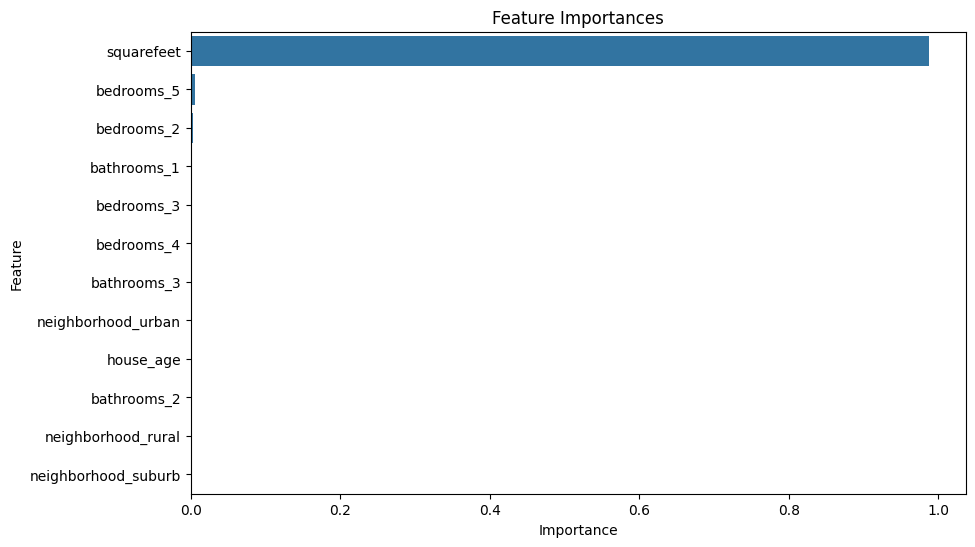

In [79]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4]
}

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Extract feature importances from the best estimator
feature_importances = grid_search.best_estimator_.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': df_train.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()


In [81]:
# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 50}


In [82]:
# Initialize the Gradient Boosting Regressor
gb_model_tuned = GradientBoostingRegressor(random_state=42,learning_rate=0.1,
                                           max_depth=3,min_samples_split=4,
                                           n_estimators=50)

# Train the model
gb_model.fit(X_train_scaled, y_train)

# Predictions on the training set using the best model
train_predictions_gb_tuned = grid_search.best_estimator_.predict(X_train_scaled)

# Predictions on the testing set using the best model
val_predictions_gb_tuned = grid_search.best_estimator_.predict(X_val_scaled)

# Evaluate the model on both sets
print("\nTuned Gradient Boosting Training set performance:")
print("Mean Squared Error:", mean_squared_error(y_train, train_predictions_gb_tuned))
print("R-squared Score:", r2_score(y_train, train_predictions_gb_tuned))

print("\nTuned Gradient Boosting Validation set performance:")
print("Mean Squared Error:", mean_squared_error(y_val, val_predictions_gb_tuned))
print("R-squared Score:", r2_score(y_val, val_predictions_gb_tuned))


Tuned Gradient Boosting Training set performance:
Mean Squared Error: 2455003574.10311
R-squared Score: 0.5760189976736441

Tuned Gradient Boosting Validation set performance:
Mean Squared Error: 2560302665.0997405
R-squared Score: 0.5637237409541278


It seems that the best model is the last model so let's train it to the full training data set

In [111]:
# Initialize the Gradient Boosting Regressor
gb_model_tuned_full = GradientBoostingRegressor(random_state=42,learning_rate=0.1,
                                           max_depth=3,min_samples_split=4,
                                           n_estimators=50)

# Train the model
gb_model_tuned_full.fit(df_full_train, y_full_train)

# Predictions on the training set using the best model
full_train_predictions_gb_tuned = gb_model_tuned_full.predict(df_full_train)

# Predictions on the testing set using the best model
test_gb_tuned = gb_model_tuned_full.predict(df_test)

# Evaluate the model on both sets
print("\nTuned Gradient Boosting Training set performance:")
print("Mean Squared Error:", mean_squared_error(y_full_train, full_train_predictions_gb_tuned))
print("R-squared Score:", r2_score(y_full_train, full_train_predictions_gb_tuned))

print("\nTuned Gradient Boosting Test set performance:")
print("Mean Squared Error:", mean_squared_error(y_test, test_gb_tuned))
print("R-squared Score:", r2_score(y_test, test_gb_tuned))


Tuned Gradient Boosting Training set performance:
Mean Squared Error: 2479652308.7491417
R-squared Score: 0.5732034339055967

Tuned Gradient Boosting Test set performance:
Mean Squared Error: 2493459519.009247
R-squared Score: 0.5661042290684806


In [112]:
import pickle

pickle.dump(gb_model_tuned_full,open("house_price_prediction.pkl","wb"))